In [1]:
from math import sqrt
from random import random, randrange, seed

In [2]:
import matplotlib
import seaborn
import pandas

In [3]:
from models import *
from methods import *

In [4]:
seed(0)

In [5]:
seaborn.set(style="darkgrid")
matplotlib.rcParams["figure.dpi"] = 300
matplotlib.rcParams["font.family"] = "serif"
matplotlib.rcParams["font.serif"] = ["Times New Roman"]

In [6]:
num_professions = 2
num_agents = 100
prof1 = 50
prof2 = num_agents - prof1
professions = [0] * prof1 + [1] * prof2
num_localities = 10
locality_caps = [10] * num_localities
random_samples = 1000

specialized_locality = (8, 2)
unspecialized_locality = (5, 5)

def _distribute_jobs(specialization):
    assert 0 <= specialization <= 5
    
    job_numbers = []
    for _ in range(specialization):
        many, few = specialized_locality
        job_numbers.append((many, few))
        job_numbers.append((few, many))
    for _ in range(2 * (5 - specialization)):
        job_numbers.append(unspecialized_locality)
        
    return job_numbers

def test_correction(specialization):
    job_numbers = _distribute_jobs(specialization)
    qualification_probabilities = \
        [[random()] * num_localities for _ in range(num_agents)]
    correction_functions = []
    for p1, p2 in job_numbers:
        # The default parameters in the lambdas are never used, but are
        # a way of getting Python's peculiar binding behavior to work.
        # See https://docs.python.org/3/faq/programming.html#why-do-
        # lambdas-defined-in-a-loop-with-different-values-all-return-
        # the-same-result for more information.
        correction_functions.append((lambda x, P1=p1: min(x, P1),
                                     lambda x, P2=p2: min(x, P2)))
    model = RetroactiveCorrectionModel(num_agents, locality_caps,
                                       num_professions, professions,
                                       qualification_probabilities,
                                       correction_functions,
                                       random_samples)
    return model

def test_interview(specialization):
    job_numbers = _distribute_jobs(specialization)
    compatibility_probabilities = [random() for _ in range(num_agents)]
    model = InterviewModel(num_agents, locality_caps, num_professions,
                           professions, job_numbers,
                           compatibility_probabilities, random_samples)
    return model

def test_coordination(specialization):
    job_numbers = _distribute_jobs(specialization)
    locality_num_jobs = [prof1 + prof2 for prof1, prof2 in job_numbers]
    compatibility_probabilities = []
    for _ in range(prof1):
        competency = random()
        compatibility_probabilities.append(
            [[competency] * p1 + [0.] * p2 for p1, p2 in job_numbers])
    for _ in range(prof2):
        competency = random()
        compatibility_probabilities.append(
            [[0.] * p1 + [competency] * p2 for p1, p2 in job_numbers])
    model = CoordinationModel(num_agents, locality_caps,
                              locality_num_jobs,
                              compatibility_probabilities,
                              random_samples)
    return model

settings = {"correction": test_correction, "interview": test_interview,
            "coordination": test_coordination}

In [7]:
data = []

def sample(setting, specialization):
    m = settings[setting](specialization)
    additive = additive_optimization(m)[1]
    greedy = greedy_algorithm(m)[1]
    datum = {}
    datum["specialization"] = specialization
    datum["additive"] = additive
    datum["greedy"] = greedy
    if additive > 0.0005:
        datum["greedy / additive"] = greedy / additive
    else:
        datum["greedy / additive"] = None
    datum["model"] = setting
    data.append(datum)
    return datum

In [8]:
from datetime import datetime
for _ in range(10):
    for specialization in range(6):
        for setting in settings:
            sample(setting, specialization)
            print(datetime.now(), setting, specialization, len(data))
from pickle import dumps
dumps(data)

Academic license - for non-commercial use only
2018-08-31 19:46:54.767751 correction 0 1
2018-08-31 19:47:36.879076 interview 0 2
2018-08-31 20:07:12.259245 coordination 0 3
2018-08-31 20:07:26.435990 correction 1 4
2018-08-31 20:08:02.953481 interview 1 5
2018-08-31 20:28:09.267336 coordination 1 6
2018-08-31 20:28:25.050383 correction 2 7
2018-08-31 20:29:10.428678 interview 2 8
2018-08-31 20:48:54.691718 coordination 2 9
2018-08-31 20:49:08.082014 correction 3 10
2018-08-31 20:49:47.158599 interview 3 11
2018-08-31 21:09:30.156206 coordination 3 12
2018-08-31 21:09:44.137851 correction 4 13
2018-08-31 21:10:25.855602 interview 4 14
2018-08-31 21:30:17.637798 coordination 4 15
2018-08-31 21:30:31.567483 correction 5 16
2018-08-31 21:31:16.793924 interview 5 17
2018-08-31 21:51:10.020497 coordination 5 18
2018-08-31 21:51:23.780960 correction 0 19
2018-08-31 21:51:58.555645 interview 0 20
2018-08-31 22:11:14.213464 coordination 0 21
2018-08-31 22:11:27.620564 correction 1 22
2018-08-3

b'\x80\x03]q\x00(}q\x01(X\x0e\x00\x00\x00specializationq\x02K\x00X\x08\x00\x00\x00additiveq\x03G@L\x8d/\x1a\x9f\xbewX\x06\x00\x00\x00greedyq\x04G@MC\xd7\n=p\xa5X\x11\x00\x00\x00greedy / additiveq\x05G?\xf0f[\xd7b\x03\xbeX\x05\x00\x00\x00modelq\x06X\n\x00\x00\x00correctionq\x07u}q\x08(h\x02K\x00h\x03G@R\x07;dZ\x1c\xach\x04G@R\x89\xca\xc0\x83\x12ph\x05G?\xf0s\xdf\x19G\x89\'h\x06X\t\x00\x00\x00interviewq\tu}q\n(h\x02K\x00h\x03G@R{t\xbcj~\xfah\x04G@T<\x8bC\x95\x81\x06h\x05G?\xf1\x84\xc6\x00zUJh\x06X\x0c\x00\x00\x00coordinationq\x0bu}q\x0c(h\x02K\x01h\x03G@Gd\xbcj~\xf9\xdbh\x04G@H)7K\xc6\xa7\xefh\x05G?\xf0\x86a\xf3\xe2\xc8\x18h\x06h\x07u}q\r(h\x02K\x01h\x03G@Q\xe2M\xd2\xf1\xa9\xfch\x04G@R\x82\x1c\xac\x081(h\x05G?\xf0\x8e\xf9\x12a9Rh\x06h\tu}q\x0e(h\x02K\x01h\x03G@SN\x87+\x02\x0cJh\x04G@UB\x1c\xac\x081\'h\x05G?\xf1\x9e\x04\xa2]+-h\x06h\x0bu}q\x0f(h\x02K\x02h\x03G@G\xf2\xb0 \xc4\x9b\xa5h\x04G@J\x08\xf5\xc2\x8f\\*h\x05G?\xf1d\xf4i\x87\xac\xe2h\x06h\x07u}q\x10(h\x02K\x02h\x03G@R\xd4Z\x1c\xac\x0

In [9]:
def _format_y(ratio):
    return f"{ratio-1:,.0%}"

def plot():
    d = pandas.DataFrame(data)
    g = seaborn.catplot(x="specialization", y="greedy / additive",
                        hue="model", data=d)
    for ax in g.axes[0]:
        vals = ax.get_yticks()
        ax.set_yticklabels([_format_y(x) for x in vals])
        ax.set_ylabel("improvement of greedy over additive")
    g.savefig("specialization.pdf")

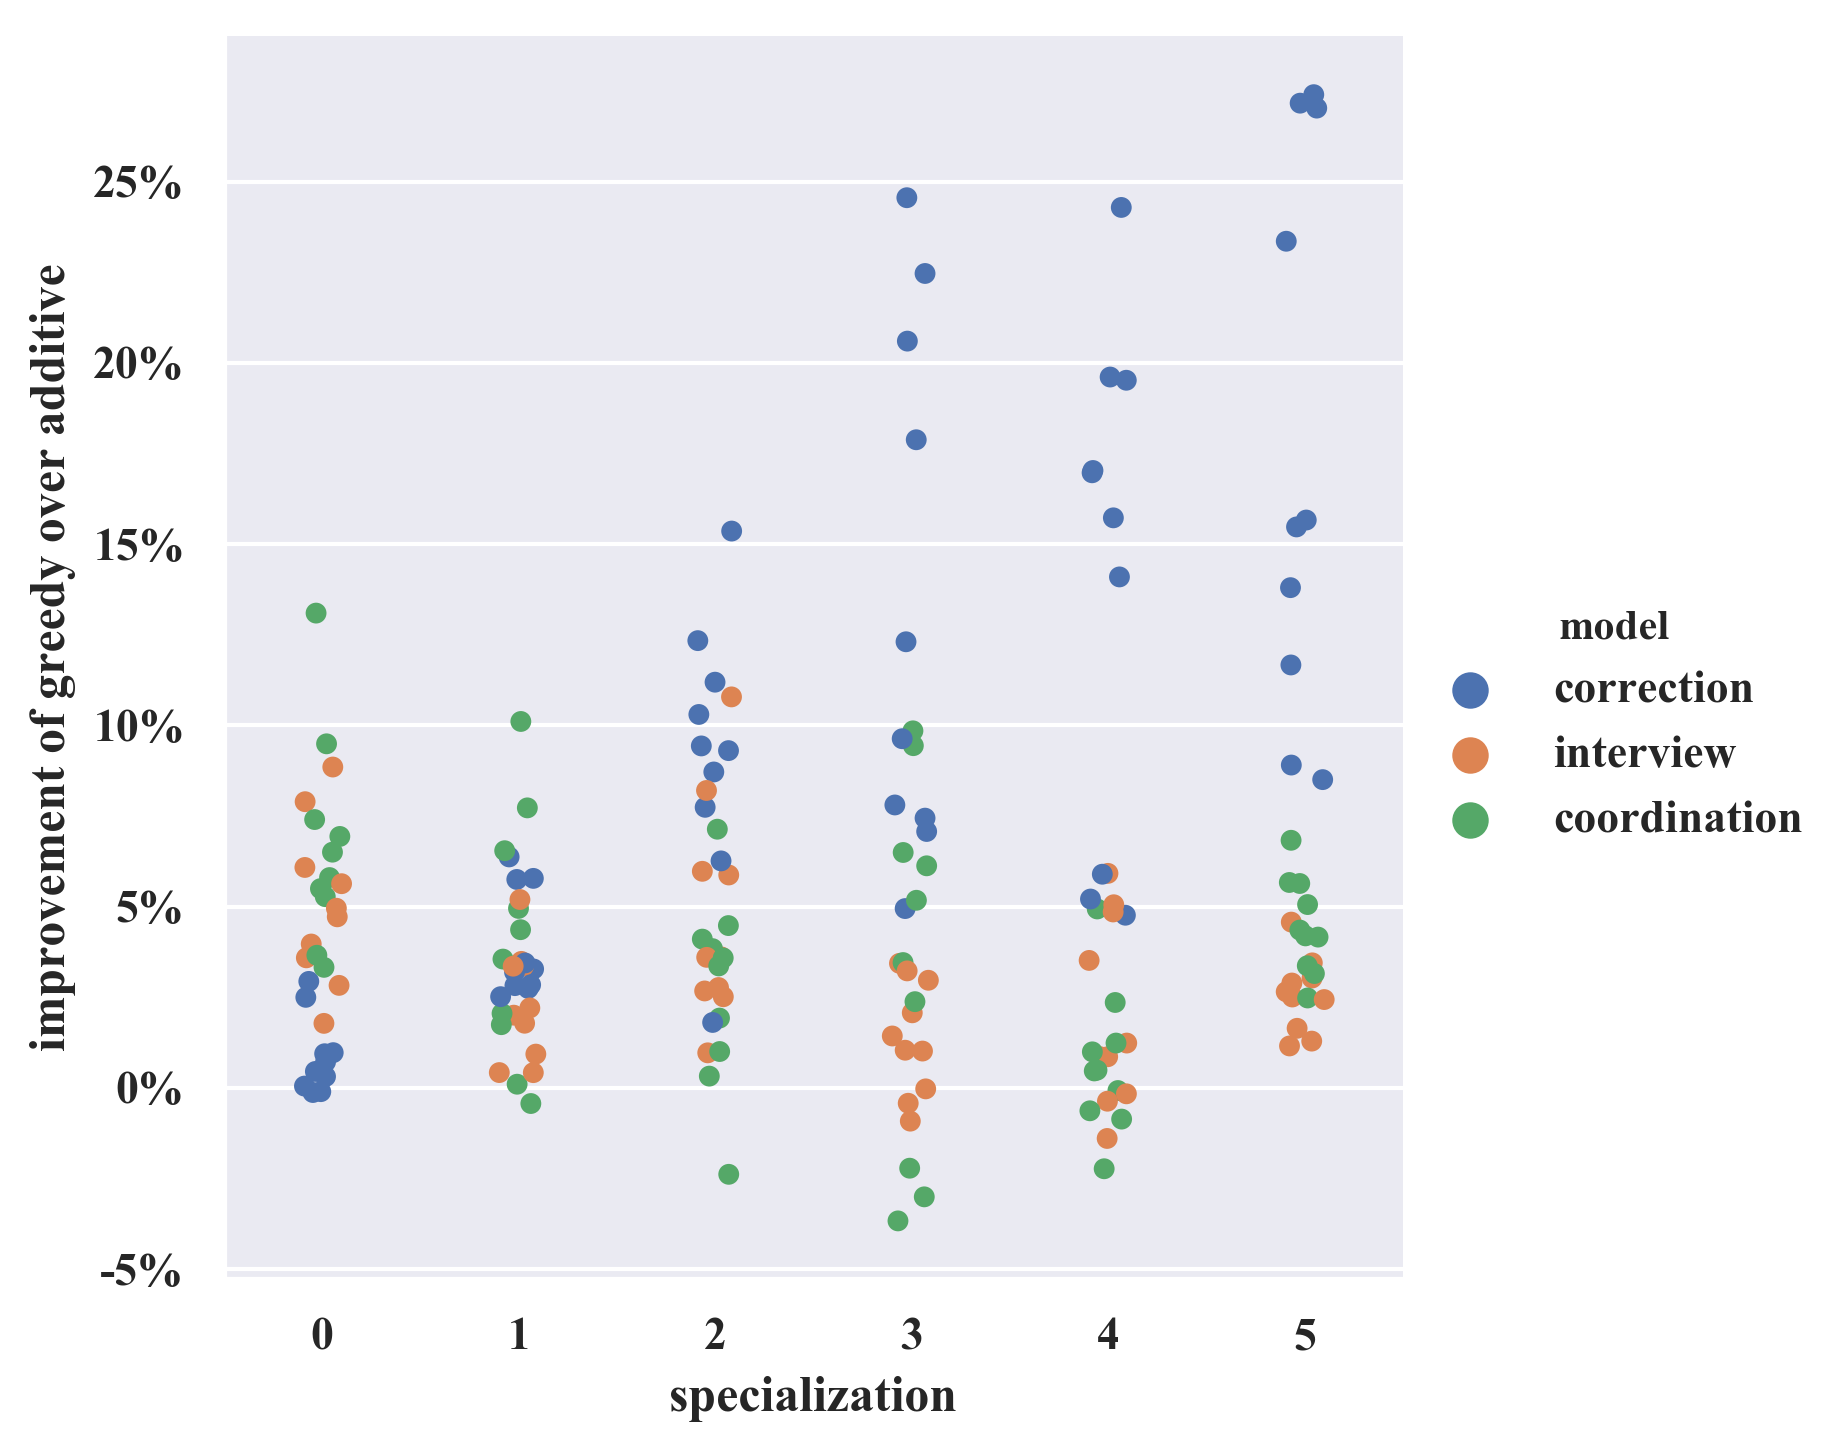

In [10]:
plot()